# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Loading the Dataset

In [2]:
df=pd.read_excel('matchstats.xlsx')

# EDA

In [3]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,E0,19/08/00,Charlton,Man City,4,0,2,0,H,Rob Harris,...,4,13,12,6,6,1,2,0,0,0
1,E0,19/08/00,Chelsea,West Ham,4,2,1,0,H,Graham Barber,...,5,19,14,7,7,1,2,0,0,0
2,E0,19/08/00,Coventry,Middlesbrough,1,3,1,1,D,Barry Knight,...,9,15,21,8,4,5,3,1,0,1
3,E0,19/08/00,Derby,Southampton,2,2,1,2,A,Andy D'Urso,...,6,11,13,5,8,1,1,0,0,2
4,E0,19/08/00,Leeds,Everton,2,0,2,0,H,Dermot Gallagher,...,6,21,20,6,4,1,3,0,0,0


In [4]:
df.shape

(7220, 23)

In [5]:
df.describe

<bound method NDFrame.describe of      Div                 Date     HomeTeam       AwayTeam  FTHG  FTAG  HTHG  \
0     E0             19/08/00     Charlton       Man City     4     0     2   
1     E0             19/08/00      Chelsea       West Ham     4     2     1   
2     E0             19/08/00     Coventry  Middlesbrough     1     3     1   
3     E0             19/08/00        Derby    Southampton     2     2     1   
4     E0             19/08/00        Leeds        Everton     2     0     2   
...   ..                  ...          ...            ...   ...   ...   ...   
7215  E0  2019-12-05 00:00:00    Liverpool         Wolves     2     0     1   
7216  E0  2019-12-05 00:00:00   Man United        Cardiff     0     2     0   
7217  E0  2019-12-05 00:00:00  Southampton   Huddersfield     1     1     1   
7218  E0  2019-12-05 00:00:00    Tottenham        Everton     2     2     1   
7219  E0  2019-12-05 00:00:00      Watford       West Ham     1     4     0   

      HTAG HTR   

In [6]:
# droping uncessary
df=df.drop('Div',axis=1)

In [7]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HTR,Referee,HS,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR
0,19/08/00,Charlton,Man City,4,0,2,0,H,Rob Harris,17,...,4,13,12,6,6,1,2,0,0,0
1,19/08/00,Chelsea,West Ham,4,2,1,0,H,Graham Barber,17,...,5,19,14,7,7,1,2,0,0,0
2,19/08/00,Coventry,Middlesbrough,1,3,1,1,D,Barry Knight,6,...,9,15,21,8,4,5,3,1,0,1
3,19/08/00,Derby,Southampton,2,2,1,2,A,Andy D'Urso,6,...,6,11,13,5,8,1,1,0,0,2
4,19/08/00,Leeds,Everton,2,0,2,0,H,Dermot Gallagher,17,...,6,21,20,6,4,1,3,0,0,0


## Encoding 

In [8]:

df.loc[df['HTR']=='H', 'HTR']=0
df.loc[df['HTR']=='A', 'HTR']=1
df.loc[df['HTR']=='D', 'HTR']=2

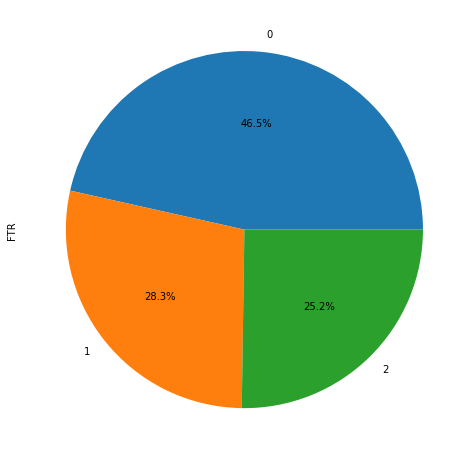

In [9]:
# Poloting pie chart for full time result
plt.figure(figsize=(8,14))
df['FTR'].value_counts('0').plot.pie(autopct='%1.1f%%')

### Data shows that about 46.5% of the teams who play home wins the match

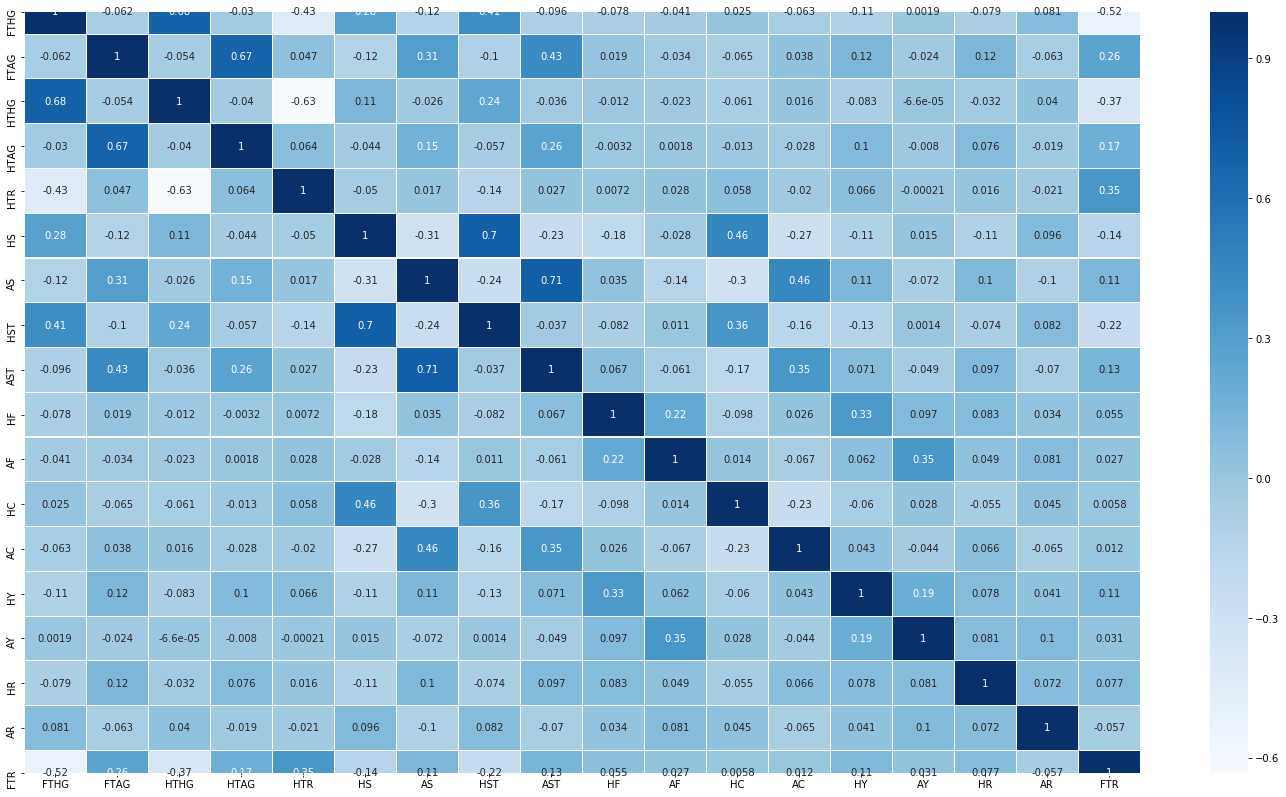

In [10]:
plt.figure(figsize=(25,14))
sns.heatmap(df.corr(),annot=True,cmap='Blues',linewidths=0.1) 
fig=plt.gcf()
plt.show()

In [11]:
corr_sale = df.corr().FTR
corr_field = corr_sale.sort_values(ascending = False).head(11)
corr_field

FTR     1.000000
HTR     0.352425
FTAG    0.259147
HTAG    0.172144
AST     0.134305
AS      0.114722
HY      0.105004
HR      0.077463
HF      0.055073
AY      0.031239
AF      0.027042
Name: FTR, dtype: float64

Text(0, 0.5, 'Total Away Shots on Target')

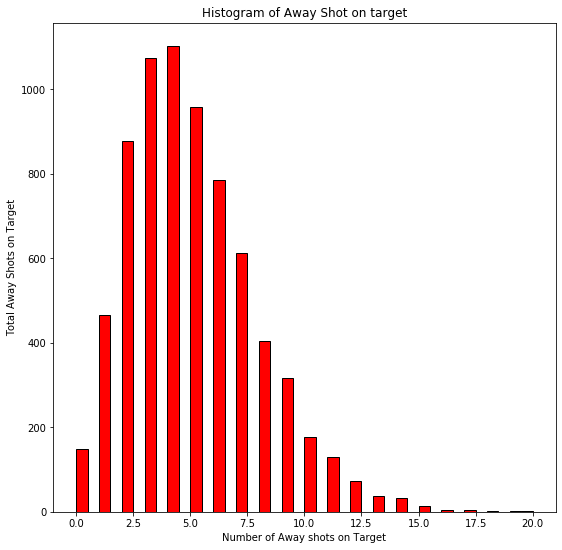

In [12]:
plt.figure(figsize=(9,9))
plt.hist(df['AST'], color = 'red', edgecolor='black', bins= int(200/5))

plt.title('Histogram of Away Shot on target')
plt.xlabel('Number of Away shots on Target')
plt.ylabel('Total Away Shots on Target')

Text(0, 0.5, 'Total Home Shots on Target')

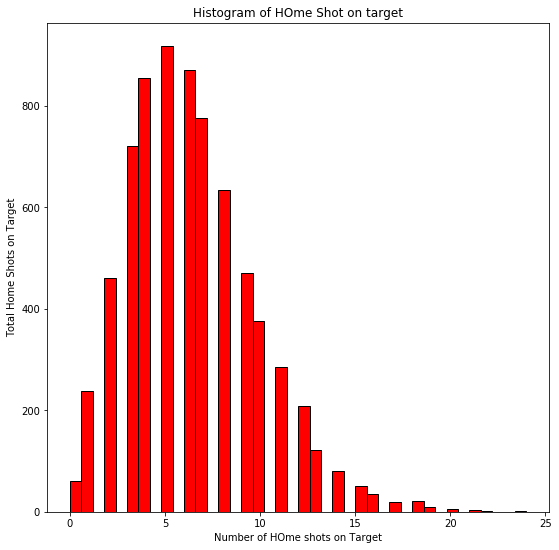

In [13]:
plt.figure(figsize=(9,9))
plt.hist(df['HST'], color = 'red', edgecolor='black', bins= int(200/5))

plt.title('Histogram of HOme Shot on target')
plt.xlabel('Number of HOme shots on Target')
plt.ylabel('Total Home Shots on Target')

In [14]:
#encodinng Data using get_dummies function

newX=pd.get_dummies(df)
newX.head()

,FTHG,FTAG,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,...,Referee_l Mason,Referee_ A D'Urso,Referee_ A Wiley,Referee_ C Foy,Referee_ D Gallagher,Referee_ H Webb,Referee_ M Atkinson,Referee_ N Barry,Referee_ S Dunn,Referee_ U Rennie
0,4,0,2,0,0,17,8,14,4,13,...,0,0,0,0,0,0,0,0,0,0
1,4,2,1,0,0,17,12,10,5,19,...,0,0,0,0,0,0,0,0,0,0
2,1,3,1,1,2,6,16,3,9,15,...,0,0,0,0,0,0,0,0,0,0
3,2,2,1,2,1,6,13,4,6,11,...,0,0,0,0,0,0,0,0,0,0
4,2,0,2,0,0,17,12,8,6,21,...,0,0,0,0,0,0,0,0,0,0


In [15]:
newX=newX.reset_index()

In [16]:
newX.fillna(0,inplace=True)

In [17]:
newX=newX.drop('FTHG', axis=1)
newX=newX.drop('FTAG', axis=1)

In [18]:
# FTR Feature represent the full time result so it is taken as target

Y =newX['FTR']
X =newX.loc[:,newX.columns!='FTR']

In [19]:
corr_sale = df.corr().FTR
corr_field= corr_sale.sort_values(ascending=False).head(11)
corr_field

FTR     1.000000
HTR     0.352425
FTAG    0.259147
HTAG    0.172144
AST     0.134305
AS      0.114722
HY      0.105004
HR      0.077463
HF      0.055073
AY      0.031239
AF      0.027042
Name: FTR, dtype: float64

#### Train and Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5776, 2179)
(1444, 2179)
(5776,)
(1444,)


In [37]:
df2=pd.read_excel('matchstats.xlsx')

In [46]:
df2.loc[df2['HTR']=='H', 'HTR']=0
df2.loc[df2['HTR']=='A', 'HTR']=1
df2.loc[df2['HTR']=='D', 'HTR']=2

In [ ]:
df2=df2.drop('Date',axis=1)

In [ ]:
df2=df2.drop('Date',axis=1)

In [ ]:
df2=df2.drop('Date',axis=1)

In [ ]:
df2=df2.drop('Date',axis=1)

In [52]:
df2=df2.drop('FTAG',axis=1)

#### Scaling

In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
rc_X = RobustScaler()
X_train = rc_X.fit_transform(X_train)
X_test=rc_X.transform(X_test)

#### Algorithm
#### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


model= GaussianNB()
scoring='accuracy'
score1= cross_val_score(model,  X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score1)
round(np.mean(score1)*100, 2)

[0.30276817 0.27508651 0.28373702 0.26297578 0.30103806 0.29065744
 0.28076256 0.25823224 0.29462738 0.28249567]


28.32

In [63]:
### NAive Bayes Testing
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

model.fit(X_train, Y_train)

prediction1 =  model.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, prediction1))
print('F1 Score:', f1_score(Y_test,prediction1,average='weighted'))

Accuracy: 0.27631578947368424
F1 Score: 0.22939244000941436


In [76]:
model.fit(X_train, Y_train)
prediction2 = model.predict(X_test)
p1= model.predict(df2)
print('The result of the match is ', p1)
print("Accuracry:",metrics.accuracy_score(Y_test, prediction2))
print('F1 Score:', f1_score(Y_test, prediction2, average='weighted'))

ValueError: operands could not be broadcast together with shapes (7220,16) (2179,) 

In [25]:
## Loading all algorithms

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## K Nearest Neighbour

In [26]:
## K Nearest Neighbour

model = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(model, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.61072664 0.58650519 0.58477509 0.64532872 0.63321799 0.60380623
 0.59618718 0.63951473 0.60831889 0.63084922]


61.39

In [27]:
model.fit(X_train, Y_train)

prediction2 = model.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, prediction2))
print('F1 Score:',f1_score(Y_test, prediction2, average='weighted'))

Accuracy: 0.6405817174515236
F1 Score: 0.6184498203049729


### Prototype for Naive Bayes 

In [ ]:
rows_list = ['Liverpool','Cardiff']
cols = df.columns
temp =4
while temp <= 19:
    if cols[temp] == 'HTR':
        print("Enter 0 for homewin, 1 for away team, 2 for draw")
        m= int(input('Enter the '+cols[temp]+'values'))
    else:
        m = int(input('Enter the '+cols[temp]+'values'))
    temp =temp+1
    rows_list.append(m)
    print(m)

In [ ]:
model.fit(X_train, Y_train)
prediction2 = model.predict(X_test)
p1= model.predict(df2)
print('The result of the match is ', p1)
print("Accuracry:",metrics.accuracy_score(Y_test, prediction2))
print('F1 Score:', f1_score(Y_test, prediction2, average='weighted'))

## Decision tree

In [28]:
## Decision tree

model = DecisionTreeClassifier(max_depth=8,max_features=100,random_state=42)
scoring = 'accuracy'
score = cross_val_score(model, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.58823529 0.50692042 0.56401384 0.5916955  0.57612457 0.55882353
 0.56325823 0.52686308 0.57365685 0.51473137]


55.64

In [29]:
model.fit(X_train, Y_train)

#test_data = test.drop("PassengerId", axis=1).copy()
prediction3 = model.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, prediction3))
print('F1 Score:',f1_score(Y_test, prediction3, average='weighted'))

Accuracy: 0.5685595567867036
F1 Score: 0.5372811389385408


### Prototype for Decisoion Tree

In [ ]:
rows_list = ['Liverpool','Cardiff']
cols = df.columns
temp =4
while temp <= 19:
    if cols[temp] == 'HTR':
        print("Enter 0 for homewin, 1 for away team, 2 for draw")
        m= int(input('Enter the '+cols[temp]+'values'))
    else:
        m = int(input('Enter the '+cols[temp]+'values'))
    temp =temp+1
    rows_list.append(m)
    print(m)

In [ ]:
model.fit(X_train, Y_train)
prediction2 = model.predict(X_test)
p1= model.predict(df2)
print('The result of the match is ', p1)
print("Accuracry:",metrics.accuracy_score(Y_test, prediction2))
print('F1 Score:', f1_score(Y_test, prediction2, average='weighted'))

## Random Forest

In [26]:
## random Forest

model = RandomForestClassifier(n_estimators=17,random_state=42,max_depth=8,max_features=100,verbose=0)
scoring = 'accuracy'
score = cross_val_score(model, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.60034602 0.60553633 0.60899654 0.62975779 0.63148789 0.61937716
 0.59618718 0.63951473 0.62218371 0.58232236]


61.36

In [27]:
model.fit(X_train, Y_train)

#test_data = test.drop("PassengerId", axis=1).copy()
prediction4 = model.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, prediction4))
print('F1 Score:',f1_score(Y_test, prediction4, average='weighted'))

Accuracy: 0.6419667590027701
F1 Score: 0.5725734671761346


### Prototype for Random Forest

In [60]:
rows_list = ['Liverpool','Cardiff']
cols = df.columns
temp =4
while temp <= 19:
    if cols[temp] == 'HTR':
        print("Enter 0 for homewin, 1 for away team, 2 for draw")
        m= int(input('Enter the '+cols[temp]+'values'))
    else:
        m = int(input('Enter the '+cols[temp]+'values'))
    temp =temp+1
    rows_list.append(m)
    print(m)

Enter the HTHGvalues1
1
Enter the HTAGvalues4
4
Enter 0 for homewin, 1 for away team, 2 for draw
Enter the HTRvalues1
1
Enter the HSvalues5
5
Enter the ASvalues12
12
Enter the HSTvalues3
3
Enter the ASTvalues8
8
Enter the HFvalues9
9
Enter the AFvalues7
7
Enter the HCvalues5
5
Enter the ACvalues8
8
Enter the HYvalues2
2
Enter the AYvalues3
3
Enter the HRvalues0
0
Enter the ARvalues0
0
Enter the FTRvalues0
0


In [59]:
model.fit(X_train, Y_train)
prediction2 = model.predict(X_test)
p1= model.predict(df2)
print('The result of the match is ', p1)
print("Accuracry:",metrics.accuracy_score(Y_test, prediction2))
print('F1 Score:', f1_score(Y_test, prediction2, average='weighted'))

ValueError: Number of features of the model must match the input. Model n_features is 2179 and input n_features is 16 

## SVM testing

In [68]:

import warnings
warnings.filterwarnings('ignore')
svm = SVC()
scoring = 'accuracy'
score = cross_val_score(svm, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print('Accuracy:',round(np.mean(score)*100,2))

[0.61418685 0.58650519 0.61418685 0.62975779 0.62802768 0.61418685
 0.6117851  0.62045061 0.6187175  0.58058925]
Accuracy: 61.18


In [69]:
model.fit(X_train, Y_train)

#test_data = test.drop("PassengerId", axis=1).copy()
prediction5 = model.predict(X_test)
print("Accuracy:",accuracy_score(Y_test, prediction5))
print('F1 Score:',f1_score(Y_test, prediction5, average='weighted'))

Accuracy: 0.27631578947368424
F1 Score: 0.22939244000941436


### Prototype for SVM Model

In [73]:
rows_list = ['Liverpool','Cardiff']
cols = df.columns
temp =4
while temp <= 19:
    if cols[temp] == 'HTR':
        print("Enter 0 for homewin, 1 for away team, 2 for draw")
        m= int(input('Enter the '+cols[temp]+'values'))
    else:
        m = int(input('Enter the '+cols[temp]+'values'))
    temp =temp+1
    rows_list.append(m)
    print(m)

Enter the HTHGvalues1
1
Enter the HTAGvalues4
4
Enter 0 for homewin, 1 for away team, 2 for draw
Enter the HTRvalues1
1
Enter the HSvalues5
5
Enter the ASvalues12
12
Enter the HSTvalues3
3
Enter the ASTvalues8
8
Enter the HFvalues9
9
Enter the AFvalues7
7
Enter the HCvalues5
5
Enter the ACvalues8
8
Enter the HYvalues2
2
Enter the AYvalues3
3
Enter the HRvalues0
0
Enter the ARvalues0
0
Enter the FTRvalues0
0


In [74]:
model.fit(X_train, Y_train)
prediction2 = model.predict(X_test)
p1= model.predict(df2)
print('The result of the match is ', p1)
print("Accuracry:",metrics.accuracy_score(Y_test, prediction2))
print('F1 Score:', f1_score(Y_test, prediction2, average='weighted'))

ValueError: operands could not be broadcast together with shapes (7220,16) (2179,) 

## Modelling 2


In [ ]:
# XG boost

from xgboost import XGBClassifier
model = XGBClassifier(max_depth=8,n_estimators=17)
scoring = 'accuracy'
score = cross_val_score(model, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

In [ ]:
from sklearn import metrics

In [ ]:
model.fit(X_train, Y_train)
prediction6 = model.predict(X_test)
print("Accuracy:%.4f" %metrics.accuracy_score(Y_test, prediction6))
print('F1 Score:%.4f' %f1_score(Y_test, prediction6, average='weighted'))

In [ ]:
# Logistic regression

model = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(model, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

In [ ]:
model.fit(X_train, Y_train)
prediction7 = model.predict(X_test)
print("Accuracy:%.4f" %metrics.accuracy_score(Y_test, prediction7))
print('F1 Score:%.4f '% f1_score(Y_test, prediction7, average='weighted'))

In [ ]:
# Ada Boost

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=300,learning_rate=0.1)
scoring = 'accuracy'
score = cross_val_score(model, X_train, Y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

In [ ]:
model.fit(X_train, Y_train)
prediction8 = model.predict(X_test)
print("Accuracy:%.4f" %metrics.accuracy_score(Y_test, prediction8))
print('F1 Score:%.4f '% f1_score(Y_test, prediction8, average='weighted'))

In [ ]:
plt.figure(figsize=(12,8))
x=['Naive Bayes','KNN','Decision Tree','Random Forest','SVM','XGBoost','Logistic Regression','AdaBoost']
y=[metrics.accuracy_score(Y_test, prediction1),metrics.accuracy_score(Y_test, prediction2),metrics.accuracy_score(Y_test, prediction3)
,metrics.accuracy_score(Y_test, prediction4),metrics.accuracy_score(Y_test, prediction5),metrics.accuracy_score(Y_test, prediction6),metrics.accuracy_score(Y_test, prediction7),metrics.accuracy_score(Y_test, prediction8)]
x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, y, color='blue')
for i, v in enumerate(y):
    plt.text(v, i, " "+str(v), color='black', va='center')
plt.ylabel("Algorithm")
plt.xlabel("Testing Accuracy")
plt.title("Accuracy scores of the models")
plt.yticks(x_pos, x)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
x=['Naive Bayes','KNN','Decision Tree','Random Forest','SVM','XGBoost','Logistic Regression','Adaboost']
y=[metrics.f1_score(Y_test, prediction1,average='weighted'),metrics.f1_score(Y_test, prediction2,average='weighted'),metrics.f1_score(Y_test, prediction3,average='weighted')
,metrics.f1_score(Y_test, prediction4,average='weighted'),metrics.f1_score(Y_test, prediction5,average='weighted'),metrics.f1_score(Y_test, prediction6,average='weighted'),
metrics.f1_score(Y_test, prediction7,average='weighted'),metrics.f1_score(Y_test, prediction8,average='weighted')]
x_pos = [i for i, _ in enumerate(x)]
plt.barh(x_pos, y, color='red')
for i, v in enumerate(y):
    plt.text(v, i, " "+str(v), color='black', va='center')
plt.ylabel("Algorithm")
plt.xlabel("F1 Score")
plt.title("F1 scores of the models")

plt.yticks(x_pos, x)

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(250,input_dim=266,activation='relu'))
model.add(Dense(250,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, Y_train,validation_split=0.2,epochs=5)

In [ ]:
prediction10=model.predict(X_test)
prediction10

In [ ]:
pred=np.argmax(prediction10,axis=1)
print("Accuracy:%.4f" %metrics.accuracy_score(Y_test, pred))